In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
s1 = pd.read_csv("chatjoin.csv", encoding='latin1')
s2 = pd.read_csv("enrolments.csv")

In [32]:
s1.head()
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21457 entries, 0 to 21456
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         21457 non-null  object
 1   id              21457 non-null  int64 
 2   created_at      21457 non-null  int64 
 3   content         21457 non-null  object
 4   was_student     21457 non-null  bool  
 5   already_passed  21457 non-null  bool  
 6   post_type       21457 non-null  object
dtypes: bool(2), int64(2), object(3)
memory usage: 880.2+ KB


In [9]:
s2.head()
s2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12898 entries, 0 to 12897
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         12898 non-null  object 
 1   created_at      12898 non-null  int64  
 2   assigned_at     5794 non-null   float64
 3   slug            12898 non-null  object 
 4   role            12898 non-null  object 
 5   is_tutor        12898 non-null  bool   
 6   grade           12087 non-null  float64
 7   gender          11869 non-null  object 
 8   score           12898 non-null  int64  
 9   coursebookmark  12898 non-null  bool   
 10  institution_id  12673 non-null  object 
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 932.2+ KB


In [11]:
# merge two dataset
merged = s1.merge(s2, on="user_id", how="outer")
merged.head()

,user_id,id,created_at_x,content,was_student,already_passed,post_type,created_at_y,assigned_at,slug,role,is_tutor,grade,gender,score,coursebookmark,institution_id
0,65f59a3a9e7f38f1d65f277d533502ce,249483.0,1.533724e+09,Thank you!,True,True,MESSAGE,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85
1,65f59a3a9e7f38f1d65f277d533502ce,249479.0,1.533724e+09,It seems like it might be trying to draw both ...,False,False,MESSAGE,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85
2,65f59a3a9e7f38f1d65f277d533502ce,249472.0,1.533724e+09,It still doesn't seem to work properly when I ...,True,False,MESSAGE,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85
3,65f59a3a9e7f38f1d65f277d533502ce,249466.0,1.533723e+09,"Okay, so when the triangle is pointing left, w...",False,False,MESSAGE,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85
4,65f59a3a9e7f38f1d65f277d533502ce,249464.0,1.533723e+09,I'm having trouble with coding the last part. ...,True,False,MESSAGE,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85


In [41]:
merged['questionAsked'] = merged['content'].apply(lambda x: 1 if pd.notnull(x) else 0)
merged.head()


,user_id,id,created_at_x,content,was_student,already_passed,post_type,created_at_y,assigned_at,slug,role,is_tutor,grade,gender,score,coursebookmark,institution_id,questionAsked
0,65f59a3a9e7f38f1d65f277d533502ce,249483.0,1.533724e+09,Thank you!,True,True,MESSAGE,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85,1
1,65f59a3a9e7f38f1d65f277d533502ce,249479.0,1.533724e+09,It seems like it might be trying to draw both ...,False,False,MESSAGE,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85,1
2,65f59a3a9e7f38f1d65f277d533502ce,249472.0,1.533724e+09,It still doesn't seem to work properly when I ...,True,False,MESSAGE,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85,1
3,65f59a3a9e7f38f1d65f277d533502ce,249466.0,1.533723e+09,"Okay, so when the triangle is pointing left, w...",False,False,MESSAGE,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85,1
4,65f59a3a9e7f38f1d65f277d533502ce,249464.0,1.533723e+09,I'm having trouble with coding the last part. ...,True,False,MESSAGE,1532937530,1.532938e+09,challenge-beginners-2018,STUDENT,False,8.0,F,410,False,f348e78bf7c7ae9a0f962d92fa72dc85,1


In [42]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33082 entries, 0 to 33081
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         33082 non-null  object 
 1   id              21457 non-null  float64
 2   created_at_x    21457 non-null  float64
 3   content         21457 non-null  object 
 4   was_student     21457 non-null  object 
 5   already_passed  21457 non-null  object 
 6   post_type       21457 non-null  object 
 7   created_at_y    33082 non-null  int64  
 8   assigned_at     16063 non-null  float64
 9   slug            33082 non-null  object 
 10  role            33082 non-null  object 
 11  is_tutor        33082 non-null  bool   
 12  grade           32139 non-null  float64
 13  gender          31330 non-null  object 
 14  score           33082 non-null  int64  
 15  coursebookmark  33082 non-null  bool   
 16  institution_id  32857 non-null  object 
 17  questionAsked   33082 non-null 

In [37]:
correlation = merged[['score', 'questionAsked']].corr(method='spearman')

print(correlation)

                  score  questionAsked
score          1.000000       0.562522
questionAsked  0.562522       1.000000


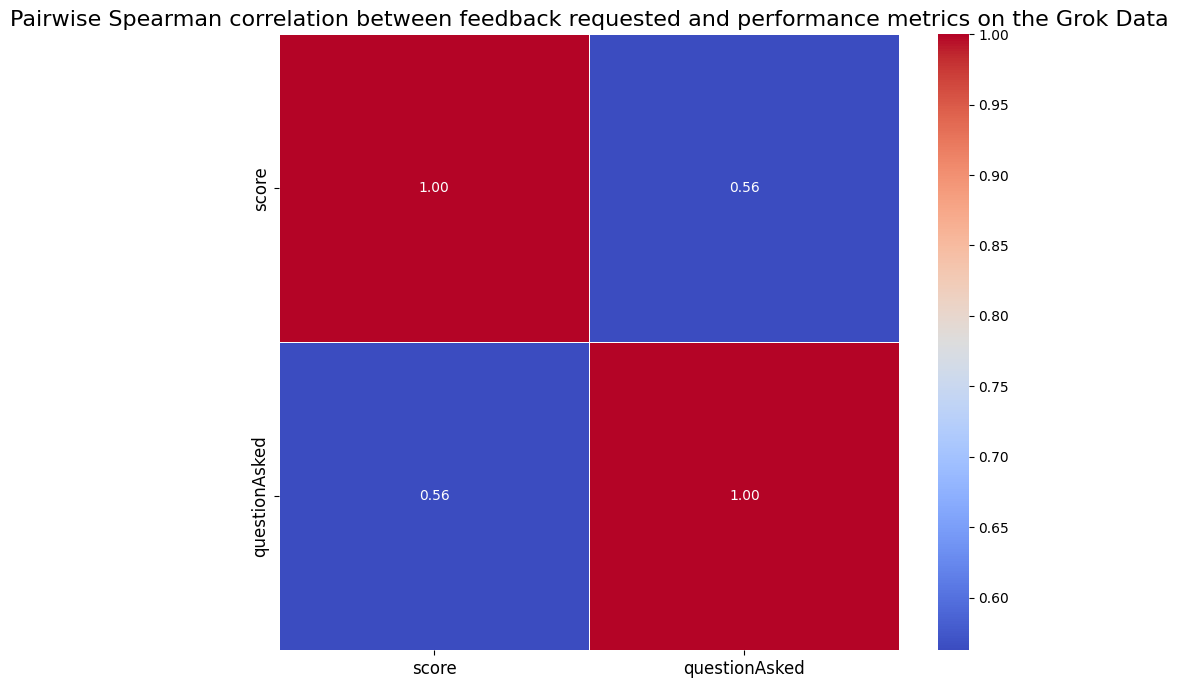

In [40]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create a correlation heatmap with improved theme
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title of the plot
plt.title('Pairwise Spearman correlation between feedback requested and performance metrics on the Grok Data', fontsize=16)

# # Customize the colorbar
# cbar = plt.colorbar()
# cbar.ax.tick_params(labelsize=12)

# Set the font size of the annotations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()